Supervised preprocessing and visualization

In [82]:
# Importiere Bibliotheken
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif

In [58]:
# Datensatz laden
data = pd.read_csv("C:\\Users\\sonja\\Downloads\\diabetes.csv")  


In [75]:
# Definition einer IQR-basierten Ausreißer-Erkennungsfunktion, die nur numerische Spalten berücksichtigt
def iqr_outlier_detection(df):
    # nur numerische spalten
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Berechne Q1 (25 %) und Q3 (75%) für jede spalte
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1

    
    # Definiere Outliers
    outliers = (df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))
    
    # Ersetze outliers mit NaN
    df_numeric[outliers] = np.nan
    return df

In [77]:
# Ausreißererkennung anwenden und durch NaN ersetzen
data_no_outliers = iqr_outlier_detection(data.copy())
print(data_no_outliers)

     preg  plas  pres  skin  insu  mass   pedi  age            class
0       6   148    72    35     0  33.6  0.627   50  tested_positive
1       1    85    66    29     0  26.6  0.351   31  tested_negative
2       8   183    64     0     0  23.3  0.672   32  tested_positive
3       1    89    66    23    94  28.1  0.167   21  tested_negative
4       0   137    40    35   168  43.1  2.288   33  tested_positive
..    ...   ...   ...   ...   ...   ...    ...  ...              ...
763    10   101    76    48   180  32.9  0.171   63  tested_negative
764     2   122    70    27     0  36.8  0.340   27  tested_negative
765     5   121    72    23   112  26.2  0.245   30  tested_negative
766     1   126    60     0     0  30.1  0.349   47  tested_positive
767     1    93    70    31     0  30.4  0.315   23  tested_negative

[768 rows x 9 columns]


In [79]:

# verwerfe Zeilen mit NaN werten
data_no_outliers_clean = data_no_outliers.dropna()
print(data_no_outliers_clean)


     preg  plas  pres  skin  insu  mass   pedi  age            class
0       6   148    72    35     0  33.6  0.627   50  tested_positive
1       1    85    66    29     0  26.6  0.351   31  tested_negative
2       8   183    64     0     0  23.3  0.672   32  tested_positive
3       1    89    66    23    94  28.1  0.167   21  tested_negative
4       0   137    40    35   168  43.1  2.288   33  tested_positive
..    ...   ...   ...   ...   ...   ...    ...  ...              ...
763    10   101    76    48   180  32.9  0.171   63  tested_negative
764     2   122    70    27     0  36.8  0.340   27  tested_negative
765     5   121    72    23   112  26.2  0.245   30  tested_negative
766     1   126    60     0     0  30.1  0.349   47  tested_positive
767     1    93    70    31     0  30.4  0.315   23  tested_negative

[768 rows x 9 columns]


In [84]:
# Merkmale einstufen
# die Zielvariable ist „class“ und die Merkmale sind alle anderen Spalten
X = data_no_outliers_clean.drop(columns=['class'])
y = data_no_outliers_clean['class']

print(X)
print(y)

     preg  plas  pres  skin  insu  mass   pedi  age
0       6   148    72    35     0  33.6  0.627   50
1       1    85    66    29     0  26.6  0.351   31
2       8   183    64     0     0  23.3  0.672   32
3       1    89    66    23    94  28.1  0.167   21
4       0   137    40    35   168  43.1  2.288   33
..    ...   ...   ...   ...   ...   ...    ...  ...
763    10   101    76    48   180  32.9  0.171   63
764     2   122    70    27     0  36.8  0.340   27
765     5   121    72    23   112  26.2  0.245   30
766     1   126    60     0     0  30.1  0.349   47
767     1    93    70    31     0  30.4  0.315   23

[768 rows x 8 columns]
0      tested_positive
1      tested_negative
2      tested_positive
3      tested_negative
4      tested_positive
            ...       
763    tested_negative
764    tested_negative
765    tested_negative
766    tested_positive
767    tested_negative
Name: class, Length: 768, dtype: object


In [87]:

# Berechnung des Informationsgewinns 
ig_scores = mutual_info_classif(X, y)
print(ig_scores)

[0.00700347 0.11690503 0.01772415 0.01654708 0.05115687 0.08356533
 0.01352606 0.05223826]


In [89]:

# Erstellen Sie einen DataFrame mit den Namen der Merkmale und den entsprechenden Werten für den Informationsgewinn
ig_df = pd.DataFrame({
    'Feature': X.columns,
    'Information Gain': ig_scores
})

print(ig_df)


  Feature  Information Gain
0    preg          0.007003
1    plas          0.116905
2    pres          0.017724
3    skin          0.016547
4    insu          0.051157
5    mass          0.083565
6    pedi          0.013526
7     age          0.052238


In [90]:
# Sortieren Sie die Merkmale nach ihrer Bewertung des Informationsgewinns
ig_df_sorted = ig_df.sort_values(by='Information Gain', ascending=False)
print(ig_df_sorted)

  Feature  Information Gain
1    plas          0.116905
5    mass          0.083565
7     age          0.052238
4    insu          0.051157
2    pres          0.017724
3    skin          0.016547
6    pedi          0.013526
0    preg          0.007003


In [94]:
# Erstellen Sie Boxplots und Verteilungsdiagramme für ein diskriminierendes und ein nicht-diskriminierendes Merkmal.
# Ermitteln Sie die Merkmale mit der höchsten und niedrigsten IG-Bewertung.
highest_ig_feature = ig_df_sorted.iloc[0]['Feature']
print("highest_ig_feature: " + highest_ig_feature)
lowest_ig_feature = ig_df_sorted.iloc[-1]['Feature']
print("lowest_ig_feature: " + lowest_ig_feature)

highest_ig_feature: plas
lowest_ig_feature: preg


In [98]:
# Extrahieren von Daten für die diskriminierenden und nicht-diskriminierenden Merkmale
discriminating_data = data_no_outliers_clean[highest_ig_feature]
print(discriminating_data)
non_discriminating_data = data_no_outliers_clean[lowest_ig_feature]
print(non_discriminating_data)



0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: plas, Length: 768, dtype: int64
0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: preg, Length: 768, dtype: int64


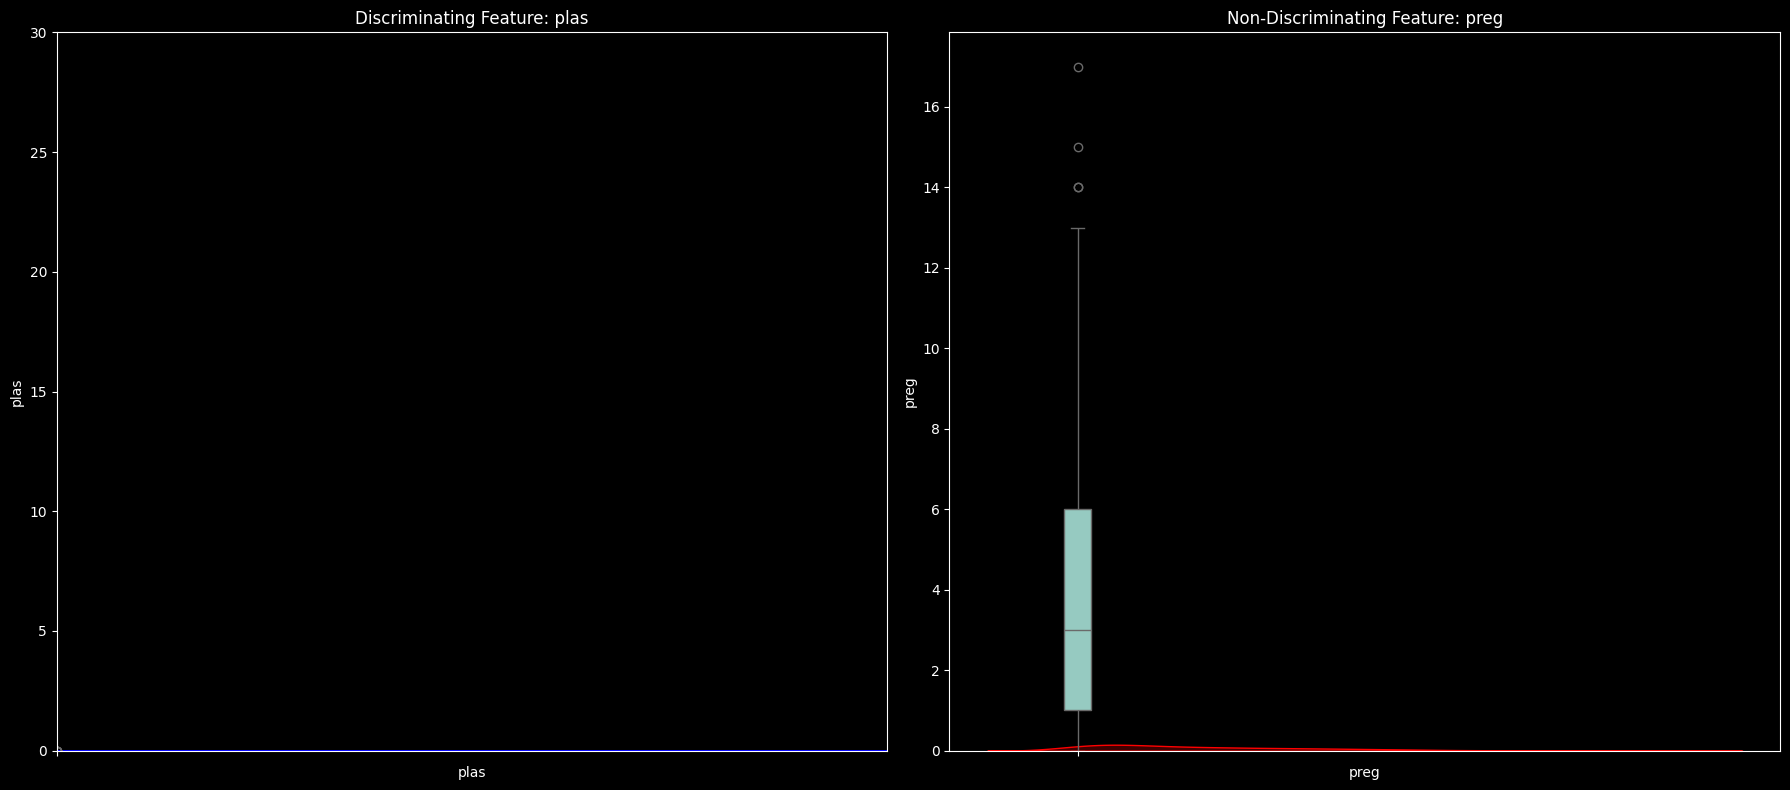

In [ ]:
# plot 
plt.figure(figsize=(18, 8))

# Boxplot und Distribution Plot für das discriminating Feature
plt.subplot(1, 2, 1)
sns.boxplot(data=discriminating_data)
sns.kdeplot(discriminating_data, color='blue', fill=True)  
plt.title(f"Discriminating Feature: {highest_ig_feature}")
plt.xlabel(highest_ig_feature)


# Boxplot und Distribution Plot für das non-discriminating Feature
plt.subplot(1, 2, 2)
sns.boxplot(data=non_discriminating_data)
sns.kdeplot(non_discriminating_data, color='red', fill=True)  
plt.title(f"Non-Discriminating Feature: {lowest_ig_feature}")
plt.xlabel(lowest_ig_feature)



# gebe die Plots aus

plt.tight_layout()
plt.show()

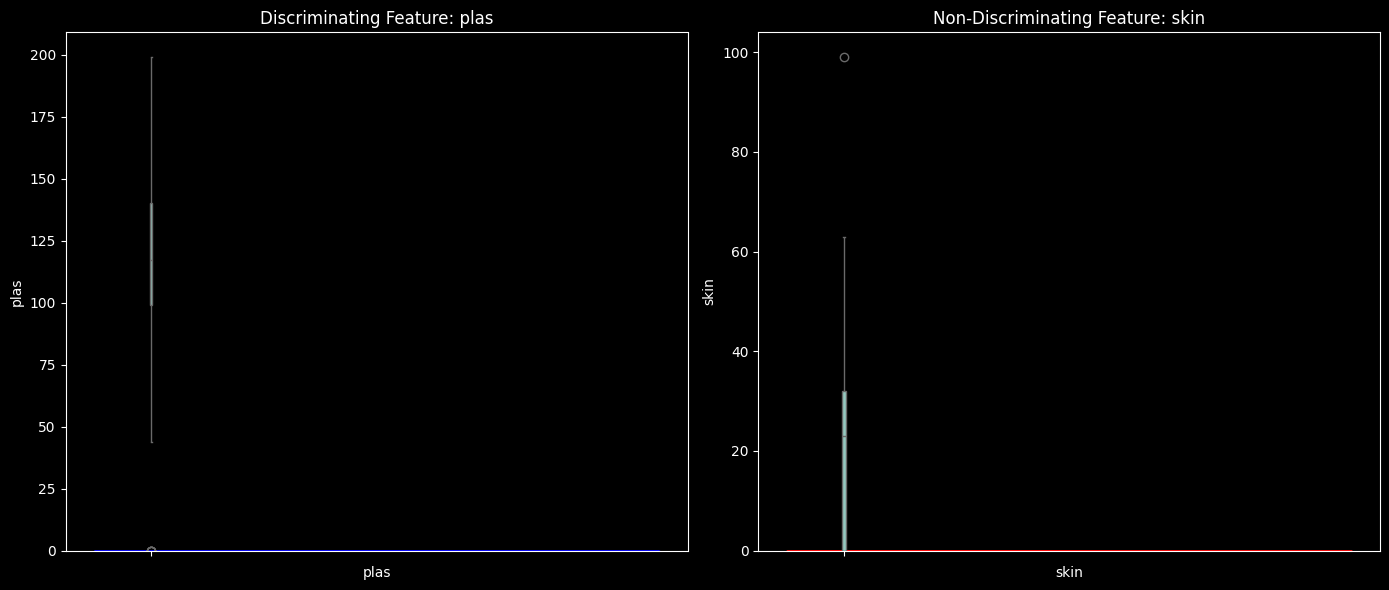